### AITech — Uczenie maszynowe — laboratoria
# 4. Regresja logistyczna

Do wykonania zadań wykorzystaj wiedzę z wykładów *3. Regresja logistyczna* i *4. Metody ewaluacji*.

## Zadanie 4 (6 punktów)

Plik *gratkapl-centrenrm.csv* zawiera dane wzbogacone o nową cechę *Centre*, przyjmującą wartość 1, jeżeli lokalizacja mieszkania to centrum, i 0 w przeciwnym przypadku.

Zamiast przywidywania ceny mieszkania, spróbuj przewidzieć lokalizację mieszkania: *centrum* vs. *nie-centrum* za pomocą regresji logistcznej.

 1. Podziel dane trenujące na nowe dane treningowe (pierwsze 4/5 danych) i testowe (ostatnie 1/5 danych)
 1. Stwórz dwuklasowy model regresji logistycznej, korzystając z cech liczbowych *Price,Rooms,SqrMeters,Floor*. Warto usunąć obserwacje odstające i dokonać normalizacji danych.
 1. Podaj procent poprawnych wyników (tzw. skuteczność, *accuracy*) dla zestawu testowego.
 
Otrzymaną wartość porównaj z wynikiem uzyskiwanym przez klasyfikator losowy (czyli taki, który przyporządkowuje losową wartość 0 lub 1 z prawdopodobieństem 1/2).

**Uwaga**: Cecha *Centre* została wygenerowana automatycznie na podstawie opisów lokalizacji mieszkań i okazuje się, że jest słabo skorelowana z cechami liczbowymi, dlatego proszę się nie przejmować, jeżeli wartości funkcji regresji logistycznej i przewidywania modelu będą nieco dziwne.

## Rozwiązanie zadania


In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from IPython.display import Markdown as md
import matplotlib.pyplot as pl

%matplotlib inline

In [145]:
# Funkcje do obliczania regresji logistycznej

# Funkcja regresji logistcznej, hipoteza
def h(theta, X):
    return 1.0/(1.0 + np.exp(-X * theta))

# Funkcja kosztu dla regresji logistycznej
def J(h, theta, X, y):
    m = len(y)
    h_val = h(theta, X)
    s1 = np.multiply(y, np.log(h_val))
    s2 = np.multiply((1 - y), np.log(1 - h_val))
    return -np.sum(s1 + s2, axis=0) / m

# Gradient dla regresji logistycznej
def dJ(h, theta, X, y):
    return 1.0 / len(y) * (X.T * (h(theta, X) - y))

# Metoda gradientu prostego dla regresji logistycznej
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

In [146]:
# Funkcja standaryzująca wybrane kolumny
def df_standarize(df, cols, axis=0):
    return df[cols].apply(lambda x: (x - x.mean()) / x.std(), axis = axis)
    

In [147]:
df = pd.read_csv("gratkapl-centrenrm.csv")
df = df[['Price','Rooms','SqrMeters','Floor', 'Centre']]
cols = ['Price','Rooms','SqrMeters','Floor']

df[cols] = df_standarize(df, cols)

In [148]:
# Przygotowanie danych
rows, cols_plus_1 = df.values.shape
cols = cols_plus_1 - 1
Xn = df.values[:, 0:cols].reshape(rows, cols)

XMx4 = np.matrix(np.concatenate((np.ones((rows, 1)), Xn), axis=1)).reshape(rows, cols_plus_1)
yMx4 = np.matrix(df.values[:, cols]).reshape(rows, 1)


In [149]:
XTrain, XTest, yTrain, yTest = model_selection.train_test_split(XMx4, yMx4, test_size=1/5, shuffle=False)
# Macierz parametrów początkowych
thetaTemp = np.ones(5).reshape(5,1)

thetaBest, errors = GD(h, J, dJ, thetaTemp, XTrain, yTrain, 
                       alpha=0.1, eps=10**-7, maxSteps=1000)
print("error =", errors[-1][0])
print("theta =", thetaBest)


error = [[0.54773702]]
theta = [[-1.09889449]
 [-0.10539513]
 [-0.6627883 ]
 [ 0.74576372]
 [-0.00829298]]


### Klasyfikacja i testy

In [150]:
classifyLogistic = lambda prob: 1 if prob > 0.5 else 0
classifyRandom = lambda prob: np.random.choice([0, 1])

res = np.asarray(h(thetaBest, XTest)).flatten()
ytest = np.asarray(yTest).flatten()

for pred, tru in zip(res, ytest):
    print(f"Predicted = {classifyLogistic(pred)} ; true = {tru}, prob = {pred:.3f}")

classified = np.array(list(map(classifyLogistic, res)))
classified_random = np.array(list(map(classifyRandom, res)))

Predicted = 0 ; true = 1.0, prob = 0.306
Predicted = 1 ; true = 1.0, prob = 0.758
Predicted = 0 ; true = 1.0, prob = 0.266
Predicted = 0 ; true = 0.0, prob = 0.158
Predicted = 1 ; true = 0.0, prob = 0.612
Predicted = 0 ; true = 0.0, prob = 0.330
Predicted = 0 ; true = 0.0, prob = 0.285
Predicted = 0 ; true = 0.0, prob = 0.192
Predicted = 0 ; true = 0.0, prob = 0.170
Predicted = 0 ; true = 1.0, prob = 0.184
Predicted = 0 ; true = 0.0, prob = 0.251
Predicted = 0 ; true = 0.0, prob = 0.369
Predicted = 0 ; true = 0.0, prob = 0.297
Predicted = 0 ; true = 0.0, prob = 0.216
Predicted = 1 ; true = 1.0, prob = 0.511
Predicted = 0 ; true = 0.0, prob = 0.202
Predicted = 0 ; true = 0.0, prob = 0.234
Predicted = 0 ; true = 0.0, prob = 0.217
Predicted = 0 ; true = 0.0, prob = 0.141
Predicted = 0 ; true = 0.0, prob = 0.246
Predicted = 0 ; true = 0.0, prob = 0.237
Predicted = 0 ; true = 1.0, prob = 0.386
Predicted = 0 ; true = 0.0, prob = 0.199
Predicted = 0 ; true = 0.0, prob = 0.227
Predicted = 0 ; 

In [151]:
# Skuteczność
accuracy = sklearn.metrics.accuracy_score(classified, ytest)
accuracy_random = sklearn.metrics.accuracy_score(classified_random, ytest)

In [152]:
md(r"Skuteczność klasyfikatora losowego $\approx %.3f$; Skuteczność modelu $\approx %.3f$ " % (accuracy_random, accuracy))

Skuteczność klasyfikatora losowego $\approx 0.490$; Skuteczność modelu $\approx 0.762$ 

### Krzywa ROC i wartość AUC

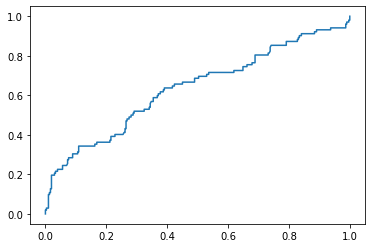

In [153]:
fpr, tpr, _  = sklearn.metrics.roc_curve(ytest,  res)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)

In [154]:
sklearn.metrics.roc_auc_score(ytest, res)

0.6347389949357226

### Krzywa Precision-Recall

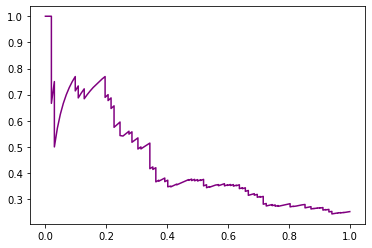

In [155]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(ytest, res)
fig, ax = plt.subplots()
ax.plot(recall, precision, c='purple')

# Weryfikacja za pomocą scikit-learn'a

(0.6347714582521751, 0.7623762376237624)

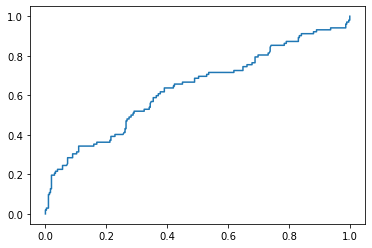

In [158]:
lr = linear_model.LogisticRegression()

df_x, df_y = df.iloc[:, 0:4], df.iloc[:,4:]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df_x, df_y, test_size = 0.2, shuffle = False)

lr.fit(xtrain, ytrain.to_numpy().ravel())

scores = lr.predict_proba(xtest)[:, 1] # Prob that values are 1
acc = lr.score(xtest, ytest.to_numpy().ravel())

fpr, tpr, _ = sklearn.metrics.roc_curve(ytest, scores)
plt.plot(fpr, tpr)
# AUC, Accuracy
sklearn.metrics.roc_auc_score(ytest, scores), lr.score(xtest, ytest.to_numpy().ravel())

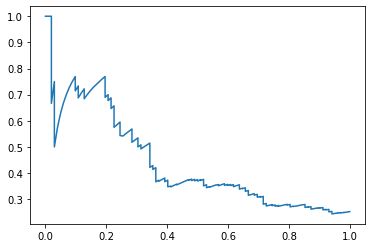

In [157]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(ytest, scores)
plt.plot(recall, precision)